In [1]:
#!pip install -U nltk

In [2]:
#!pip install beautifulsoup4

In [3]:
#! pip install wordcloud

In [4]:
from bs4 import BeautifulSoup

In [5]:
import os
import pandas as pd
import sys
import re
import time
import PyPDF2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords');
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import seaborn as sns
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
import matplotlib.pyplot as plt

In [8]:
# read data 
papers = pd.read_csv('Dimensions-Publication-2022-06-18_08-01-04.csv', skiprows=1)

In [9]:
papers.head()

,Publication ID,DOI,Title,Abstract,Source title/Anthology title,PubYear,Volume,Issue,Pagination,Authors,Authors Affiliations - Name of Research organization,Authors Affiliations - Country of Research organization,Dimensions URL,Times cited,Cited references
0,pub.1139564466,10.1038/s41598-021-92511-6,Optimal supply chains and power sector benefit...,Green hydrogen can help to decarbonize parts o...,Scientific Reports,2021,11,1,14191,"Stöckl, Fabian; Schill, Wolf-Peter; Zerrahn, A...",German Institute for Economic Research; Techni...,Germany; Germany; Australia,https://app.dimensions.ai/details/publication/...,9,"[Gils, Hans Christian; Simon, Sonja]|[ur.07362..."
1,pub.1146336974,10.1016/j.scitotenv.2022.154624,Hydrogen emissions from the hydrogen value cha...,Future energy systems could rely on hydrogen (...,The Science of The Total Environment,2022,830,NaN,154624,"Cooper, Jasmin; Dubey, Luke; Bakkaloglu, Semra...",Imperial College London,United Kingdom,https://app.dimensions.ai/details/publication/...,0,"[Colella, W.G.; Jacobson, M.Z.; Golden, D.M.]|..."
2,pub.1147087047,10.1146/annurev-chembioeng-092220-010254,Hydrogen Production and Its Applications to Mo...,Hydrogen has been identified as one of the key...,Annual Review of Chemical and Biomolecular Eng...,2022,13,1,NaN,"Gonzalez-Garay, Andres; Bui, Mai; Ordóñez, Die...",Imperial College London,United Kingdom,https://app.dimensions.ai/details/publication/...,0,"[Lehner, Markus; Tichler, Robert; Steinmüller,..."
3,pub.1115964915,10.1016/j.biortech.2019.121573,Concentrating lactate-carbon flow on medium ch...,Upgrading lactate/carbohydrate-rich waste biom...,Bioresource Technology,2019,291,NaN,121573,"Wu, Qinglian; Guo, Wanqian; You, Shijie; Bao, ...",Harbin Institute of Technology,China,https://app.dimensions.ai/details/publication/...,23,"[Xu, Jiajie; Guzman, Juan J. L.; Andersen, Ste..."
4,pub.1126180996,10.1016/j.scitotenv.2020.138532,Challenges and solutions for addressing critic...,Coronavirus (COVID-19) is highly infectious ag...,The Science of The Total Environment,2020,725,NaN,138532,"Rowan, Neil J; Laffey, John G",Athlone Institute of Technology; National Univ...,Ireland; Ireland; Ireland,https://app.dimensions.ai/details/publication/...,246,"[Mitchell, Robyn; Ogunremi, Toju; Astrakianaki..."


In [10]:
papers.dtypes

Publication ID                                             object
DOI                                                        object
Title                                                      object
Abstract                                                   object
Source title/Anthology title                               object
PubYear                                                     int64
Volume                                                     object
Issue                                                      object
Pagination                                                 object
Authors                                                    object
Authors Affiliations - Name of Research organization       object
Authors Affiliations - Country of Research organization    object
Dimensions URL                                             object
Times cited                                                 int64
Cited references                                           object
dtype: obj

In [11]:
papers[['Abstract', 'Title']] = papers[['Abstract', 'Title']].astype('string')

### Show the title of the news and the news body 

In [12]:
for row in papers.itertuples():
    print(row.Title)
    print(row.DOI)
    
    print(" ")
    
    print(row.Abstract)
    
    print("_______________________________________________________ ")
    

    


Optimal supply chains and power sector benefits of green hydrogen
10.1038/s41598-021-92511-6
 
Green hydrogen can help to decarbonize parts of the transportation sector, but its power sector interactions are not well understood so far. It may contribute to integrating variable renewable energy sources if production is sufficiently flexible in time. Using an open-source co-optimization model of the power sector and four options for supplying hydrogen at German filling stations, we find a trade-off between energy efficiency and temporal flexibility. For lower shares of renewables and hydrogen, more energy-efficient and less flexible small-scale on-site electrolysis is optimal. For higher shares of renewables and/or hydrogen, more flexible but less energy-efficient large-scale hydrogen supply chains gain importance, as they allow to temporally disentangle hydrogen production from demand via storage. Liquid hydrogen emerges as particularly beneficial, followed by liquid organic hydrogen ca

### Add the abstract column in one string

In [13]:
papers.dropna(inplace = True, axis=0)

In [14]:
abstract = " ".join([news for news in papers['Abstract']])
title = " ".join([news for news in papers['Title']])

In [30]:
abstract = abstract.lower()
title = title.lower()

In [15]:
#remove special characters
def remove_special(text):
    marks = ['(',')','[',']', '?', '.', ':', ',', '\n', '%']
    for x in text:
        if x in marks:
            text = text.replace(x,"")
    return(text)

In [45]:
# full code 

##TEXT defined in the workbook

def text_to_cloud(text_obj, stem):
    
    """
    The function takes in a text object and the preference to use stemmed text or tokenized text 
    
    The return is a word cloud of the desired document
    
    """
        
    # remove special charachters 
    text_total = remove_special(text_obj)
    
    #create a lower case words
    text_total = text_total.lower()
    
    
    #Tokenize 
    text_total = word_tokenize(text_total)
    
    #remove specific terms
    text_total = [e for e in text_total if e not in ('in', 'a', 'is', 'the', 'of', 'to', 'by', 'from', 'will', 
                                                    'and', 'for', 'on', 'at', 'that', 'be', 'are', 'is', 
                                                    'its', 'than', 'this', 'their', 'these', 'as', 'also'
                                                    ,'an', 'with', 'was', 'but', 'or', 'such', 'into', 'which')]
    
    # stemming
    stemmed_text = []
    porter = PorterStemmer()
    for x in text_total:
        x = porter.stem(x)
        stemmed_text.append(x)
        
    # lemitization
    lem_text = []
    lemmatizer = WordNetLemmatizer()
    for x in text_total:
        x = lemmatizer.lemmatize(x)
        lem_text.append(x)
        
    
    #declare global variable to be used for the word count plot latter
    global text_total_tocloud
    
    #condition to decide if use tokenized text or stemmed text 
    if stem == 1:
        text_total_tocloud = stemmed_text
    
    elif stem ==2:
        text_total_tocloud = lem_text
        
    else:
        text_total_tocloud = text_total
    
    # join total text in a single sentence
    text_total_tocloud = " ".join(text_total_tocloud)
    
    
    # create a wordCloud
    # visualization of the stemmed sentences

    wordcloud_low = WordCloud( width = 800, height = 500, random_state = 24,background_color='white',
                             max_font_size = 100).generate(text_total_tocloud)



    
    plt.figure(figsize=(15,8))
    plt.axis('off')
    plt.imshow(wordcloud_low)
    plt.tight_layout(pad = 1)
    plt.show()


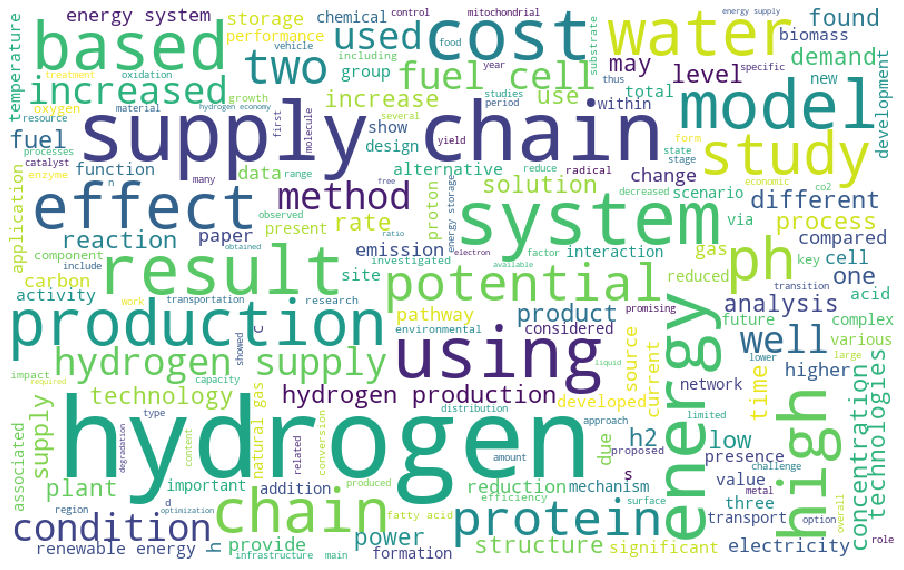

In [46]:
text_to_cloud(abstract, 0)

In [25]:
# Required functions

# count the words in the stemmed or the tokenied text 
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts


# plot the outcome
def word_count_plot(dataf, plot_title):    
    sns.catplot(
        data=dataf,
        x='word',
        y='word count',
        kind = 'bar',
        height=5, # make the plot 5 units high
        aspect=3); # height should be three times width
    plt.title(plot_title )
    plt.xticks(rotation=90, fontsize= 10)

    plt.show()

In [47]:
# full code 


def plot_of_counts(text, plot_title, number_of_repeats_to_ignore):
    
    #create the word counts dictionary of the analyzed text
    word_count_dic = word_count(text)
    
    # create a dataframe of the dictionary 
    total_text_count = pd.DataFrame.from_dict(word_count_dic, orient ='index')
    
    # reset index of the dataframe
    total_text_count.reset_index(inplace = True)
    
    # rename dataframe columns
    total_text_count.columns = ['word', 'word count']
    
    #remove "in, a, is, the, of, to, by, from"
    #words_to_remove = ['in', 'a', 'is', 'the', 'of', 'to', 'by', 'from', 'will']
    #total_text_count = total_text_count[~total_text_count['word'] not in(words_to_remove)]
    
    
    #choose only words that are repeated more than x times
    total_text_count_x = total_text_count[total_text_count['word count']>number_of_repeats_to_ignore]
    
    # sort values
    total_text_count_x = total_text_count_x.sort_values('word count',  ascending=False)
    
    #plot the outcome
    word_count_plot(total_text_count_x, plot_title) 

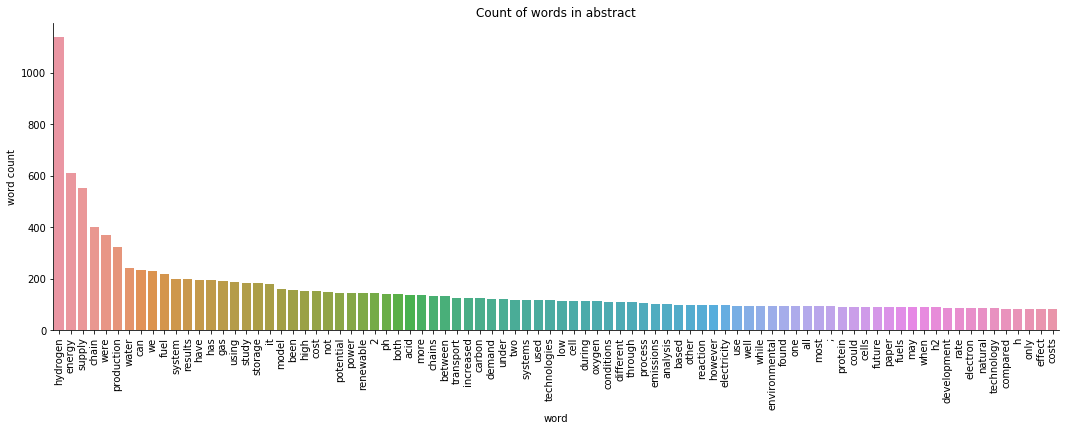

In [48]:
plot_of_counts(text_total_tocloud, 'Count of words in abstract', 80)